In [ ]:
#docstring here - what does the code do?

In [1]:
#import modules (straight from wk2&3 so far) - do i need more?
import pandas as pd
import geopandas as gpd
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs

#enable interactive plotting
plt.ion()

In [2]:
#Define functions
#generate handles to create legend for map features
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

In [3]:
# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)


In [19]:
#load lga vector outline polygon for central highlands, check row header and CRS
lga = gpd.read_file('data/ch_lga_ext.shp')
print(lga.head())

                    LGA_NAME           ABB_NAME STATE  Shape_Leng  Shape_Area  \
0  Central Highlands Council  Central Highlands   TAS    5.396386    0.870373   

                                            geometry  
0  POLYGON ((146.81862 -41.70170, 146.81876 -41.7...  


In [20]:
#load land vector polygons for tasmania, check row header and CRS
land = gpd.read_file('data/land_100k.shp')
print(land.head())

     LS_REGION     RAINFALL  \
0  King Island   750-1000mm   
1  King Island   750-1000mm   
2  King Island  1000-1250mm   
3  King Island   750-1000mm   
4  King Island   750-1000mm   

                                             GEO_AGE  \
0                                 Siliurian-Devonian   
1                                 Siliurian-Devonian   
2  Lower Devonian-Tremadocian-Cambrian (Mathinna ...   
3                                 Siliurian-Devonian   
4                                 Siliurian-Devonian   

                                                ROCK   ALTITUDE  \
0           Sedimentary argillaceous (e.g. mudstone)  0 to 300m   
1           Sedimentary argillaceous (e.g. mudstone)  0 to 300m   
2  Sedimentary calcareous (e.g. limestone, dolomite)  0 to 300m   
3           Sedimentary argillaceous (e.g. mudstone)  0 to 300m   
4           Sedimentary argillaceous (e.g. mudstone)  0 to 300m   

                    LANDFORM  \
0  Coastal dunes and beaches   
1  Coasta

In [21]:
#load water vector polygons for tasmania, check row header and CRS
water = gpd.read_file('data/water.shp')
print(water.head())

   WB_ID           WB_NAME       WB_AREA    WB_ELEV  SUBCAT_ID     WB_MAP  \
0   37.0  Pearshape Lagoon  76739.706135  67.955810    10007.0  PEARSHAPE   
1   38.0              None  15753.090750   1.170759    47044.0    SELLARS   
2   39.0              None  77035.664648   1.199716    47044.0    SELLARS   
3   40.0              None  10551.538700   0.192473    47046.0      LOGAN   
4   41.0              None  11750.059306   2.025227    47046.0      LOGAN   

                       WB_INFO    SHAPE_AREA    SHAPE_LEN  \
0  https://wrt.tas.gov.au/cfev  76739.706135  1149.462374   
1  https://wrt.tas.gov.au/cfev  15753.090750   524.353991   
2  https://wrt.tas.gov.au/cfev  77035.664648  1167.638141   
3  https://wrt.tas.gov.au/cfev  10551.538700   554.163424   
4  https://wrt.tas.gov.au/cfev  11750.059306   589.776428   

                                            geometry  
0  POLYGON ((237371.256 5561317.364, 237390.755 5...  
1  POLYGON ((606643.582 5561066.260, 606657.882 5...  
2  PO

In [22]:
#load roads vector lines for tasmania, check row header and CRS
roads = gpd.read_file('data/tas_roads.shp')
print(roads.head())

  REGION ROAD_NO       ROAD_NAME  START_CHNG  END_CHNG  LANE_KM  \
0     NE   A0087     Midland Hwy        0.00      0.80     0.80   
1     NE   A0087     Midland HWY        3.38      3.72     0.33   
2     NE   A1468    Illawarra MR        2.72      2.89     0.17   
3      S   A0498   South Arm HWY        0.00      0.02     0.02   
4     NE   A1565  Lady Barron MR        0.00      9.46    18.92   

               ROAD_CAT                                           geometry  
0            Trunk Road  LINESTRING (512389.184 5397211.740, 512425.095...  
1            Trunk Road  LINESTRING (514982.907 5396553.993, 514978.202...  
2            Trunk Road  LINESTRING (509665.705 5396414.450, 509683.641...  
3  Regional Access Road  LINESTRING (533241.099 5252633.985, 533250.220...  
4            Other Road  LINESTRING (599521.087 5552896.323, 599527.951...  


In [23]:
#load boreholes vector points for tasmania, check row header and CRS
bhs = gpd.read_file('data/drill_eng_geo.shp')
print(bhs.head())

   DRILL_ID     NAME                       KEYWORDS              PURPOSE  \
0     614.0  Bore 1M  Tarraleah - Butlers Gorge Dam  Engineering geology   
1     616.0  Bore 4L  Tarraleah - Butlers Gorge Dam  Engineering geology   
2     617.0  Bore 5L  Tarraleah - Butlers Gorge Dam  Engineering geology   
3     618.0  Bore 3M  Tarraleah - Butlers Gorge Dam  Engineering geology   
4     620.0  Bore 7L  Tarraleah - Butlers Gorge Dam  Engineering geology   

                     COMPANY DRILL_TYPE DATE_DRILL  LENGTH  AZIMUTH  DIP  \
0  Hydro Electric Commission    Diamond    01/1938    26.0      0.0  0.0   
1  Hydro Electric Commission    Diamond    01/1938    22.0      0.0  0.0   
2  Hydro Electric Commission    Diamond    01/1938    17.0      0.0  0.0   
3  Hydro Electric Commission    Diamond    01/1938     6.0      0.0  0.0   
4  Hydro Electric Commission    Diamond    01/1938    39.0      0.0  0.0   

      RL                     geometry  
0  730.0  POINT (146.26172 -42.26638)  
1  730

In [24]:
#check crs of each layer
print(lga.crs)
print(land.crs)
print(water.crs)
print(roads.crs)
print(bhs.crs)

epsg:7844
epsg:28355
epsg:28355
epsg:28355
epsg:4283


In [25]:
#change projection to web mercator (so same as basemap that will be added later, note epsg20251 is correct for Aus)
lga = lga.to_crs(epsg=3857)
land = land.to_crs(epsg=3857)
water = water.to_crs(epsg=3857)
roads = roads.to_crs(epsg=3857)
bhs = bhs.to_crs(epsg=3857)

In [26]:
#check all crs match, use assert to raise an error if not true
lga.crs == land.crs == water.crs == roads.crs == bhs.crs

True

<AxesSubplot:>

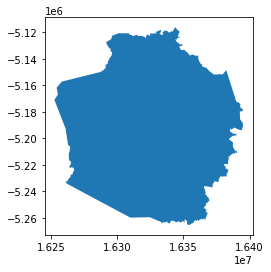

In [27]:
#plot extent of lga
ch_lga.plot()

In [30]:
#clip all state wide vector layers to central highlands lga subset
#see https://geopandas.org/en/stable/gallery/plot_clip.html
bhs_clip = gpd.clip(bhs, lga)


<AxesSubplot:>

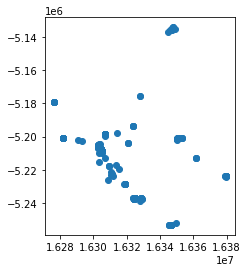

In [31]:
bhs_clip.plot()

In [33]:
land_clip = gpd.clip(land, lga)

<AxesSubplot:>

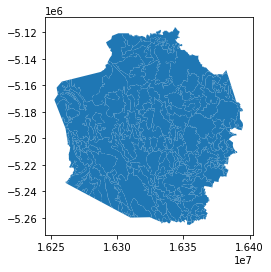

In [34]:
land_clip.plot()